In [2]:
#web scrape
import requests
from bs4 import BeautifulSoup



def get_video_links(archive_url):

	r = requests.get(archive_url)
	soup = BeautifulSoup(r.content,'html.parser')
	links = soup.findAll('a')
	video_links = [archive_url + link['href'] for link in links if link['href'].endswith('wav')]
	return video_links


def download_video_series(video_links, number):
	directory_path = f"./audio/{number}/"

	for link in video_links:
		file_name = f"{directory_path}{link.split('/')[-1]}"

		print( "Downloading file:%s"%file_name)
		r = requests.get(link, stream = True)
		with open(file_name, 'wb') as f:
			for chunk in r.iter_content(chunk_size = 1024*1024):
				if chunk:
					f.write(chunk)
		
		print( "%s downloaded!\n"%file_name )

	print ("All videos downloaded!")
	return

for i in range(10):
	archive_url = f"https://clarksonmsda.org/ml/audio2/data/numbers/{i}/"

	video_links = get_video_links(archive_url)

	download_video_series(video_links, i)
	

	

  

./audio/0/american_f_Alexa_20230406110149.wav downloaded!

./audio/0/american_f_Alexa_20230406110150.wav downloaded!

./audio/0/american_f_Maria_20230405140612.wav downloaded!

./audio/0/american_m_Evan_20230406131112.wav downloaded!

./audio/0/american_m_Josh_20230405130012.wav downloaded!

./audio/0/american_m_Josh_20230405130013.wav downloaded!

./audio/0/american_m_Selorm_20230408180030.wav downloaded!

./audio/0/american_m_Shaun_20230406131836.wav downloaded!

./audio/0/american_m_Shaun_20230406131837.wav downloaded!

./audio/0/americans_m_MaximusPowers_20230404125947.wav downloaded!

./audio/0/brazilian_m_Maeva_20230406094754.wav downloaded!

./audio/0/chinese_m_Sam_20230411131718.wav downloaded!

./audio/0/ghanaian_m_Emma_20230411134116.wav downloaded!

./audio/0/ghanaian_m_Wilson_20230411133436.wav downloaded!

./audio/0/ghanaian_m_Wisdom_20230411133750.wav downloaded!

./audio/0/indian_f_Bhavana_20230406090952.wav downloaded!

./audio/0/indian_f_Tejaswini_20230406085213.wav do

In [3]:
import IPython.display as ipd
ipd.Audio('audio/1/american_f_Alexa_20230406110150.wav')

In [6]:
import os

In [ ]:
# Remove files
for i in range(10):
    file_path = f"./audio/{i}/.DS_Store"

    # Check if the file exists
    if os.path.exists(file_path):
        # Remove the file
        os.remove(file_path)
        print(f"File {file_path} removed successfully")
    else:
        print(f"File {file_path} not found")


In [7]:
import librosa as librosa
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# generating spectrograms of the data
# Saving them into dictionaries for later analysis part

spectrograms_dictionary = {}
waveforms_dictionary = {}
mel_spectrogram_dictionary= {}
mel_spectrogram_crop_dictionary= {}



path = "./audio/"

for j in range(10):
    spectrograms = []
    waveforms = []
    mel_spectrogram = []
    mel_spectrogram_crop =[]

    dir_list = os.listdir(f"{path}{j}/")
    
    
    for i,file_name in enumerate(dir_list):

        y, sr = librosa.load(f"{path}{j}/{file_name}")
        waveforms.append(y)

        # plt.figure(figsize=(14,5))
        # imgw = librosa.display.waveshow(y, sr=sr, color='black')
        # plt.title(f'waveform for number {j} :{file_name}')
        # output_file = f"./waveform/{j}/{file_name[:-3]}.png"
        # plt.savefig(output_file, dpi=300, bbox_inches='tight')
        

        spectrogram = librosa.stft(y)
        spectrograms.append(spectrogram)

        S=librosa.feature.melspectrogram(y=y,sr=sr,n_mels=128,)
        s_db_mel=librosa.amplitude_to_db(S, ref=np.max)
        mel_spectrogram.append(s_db_mel)

        mask = s_db_mel.max(axis=0) >-70 #np.min(stats.mode(s_db_mel))
        filtered_arr = s_db_mel[:, mask]
        mel_spectrogram_crop.append(filtered_arr)
        
        # plt.figure(figsize=(14,5))
        # img=librosa.display.specshow(filtered_arr,sr=sr,x_axis='s',y_axis='linear')
        # plt.title(f'mel_spectrogram_crop for number {j} :{file_name}')
        # plt.colorbar()
        # output_file = f"./mel_spectro_crop/{j}/{file_name[:-3]}.png"
        # plt.savefig(output_file, dpi=300, bbox_inches='tight')


    
    spectrograms_dictionary[j] = spectrograms
    
    waveforms_dictionary[j] = waveforms
    mel_spectrogram_dictionary[j]= mel_spectrogram
    mel_spectrogram_crop_dictionary[j]=mel_spectrogram_crop

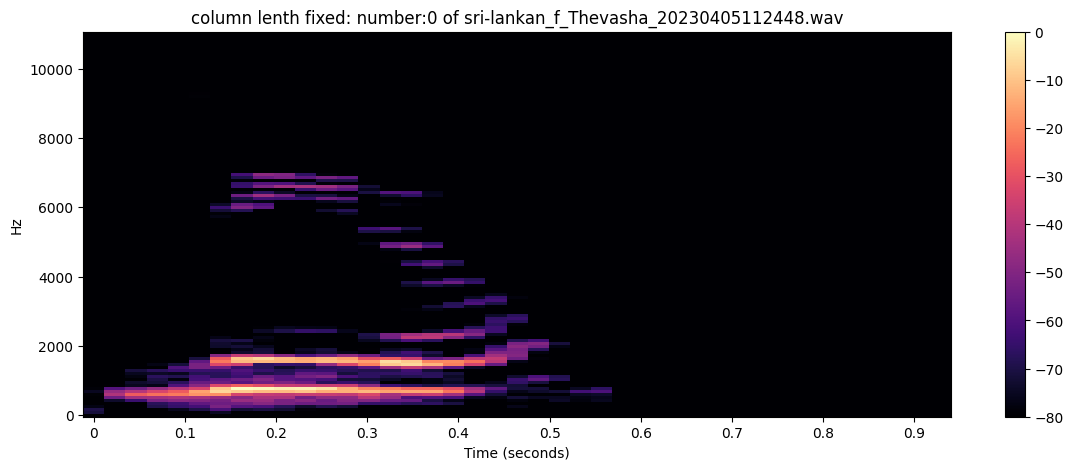

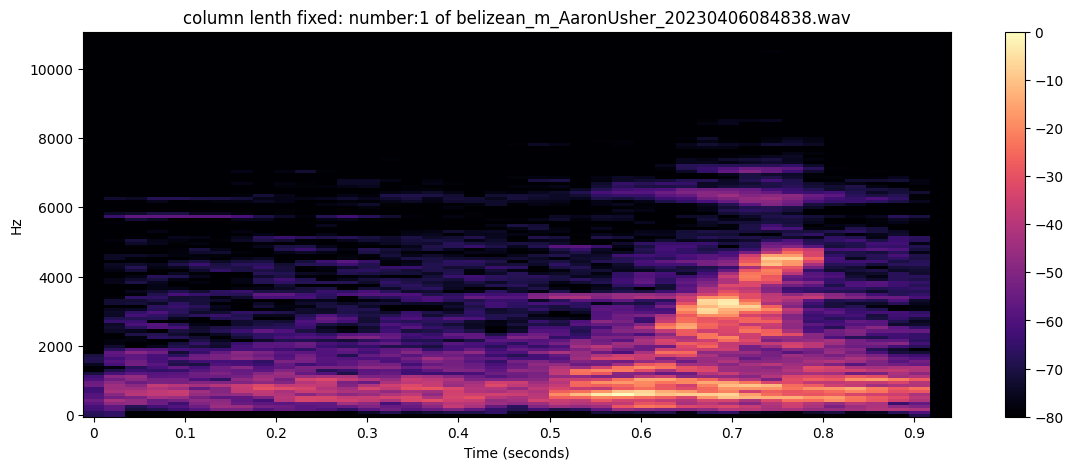

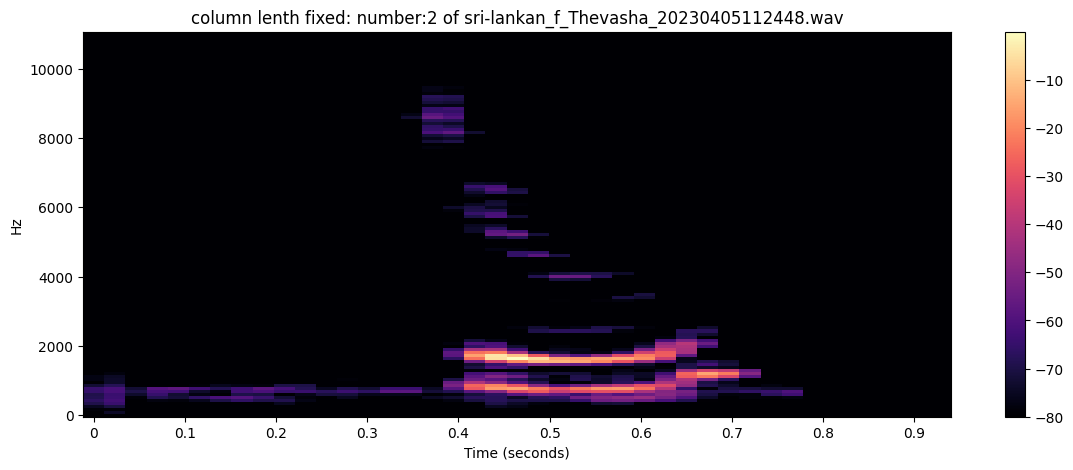

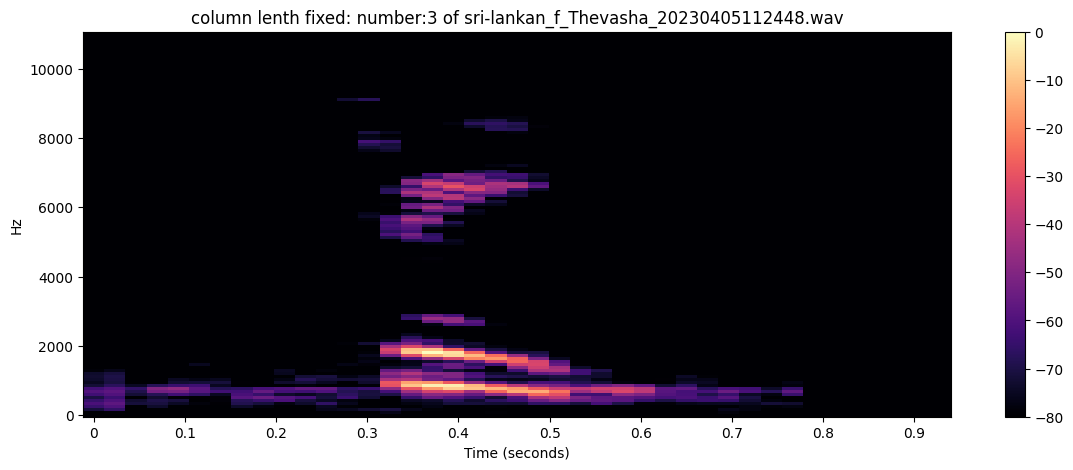

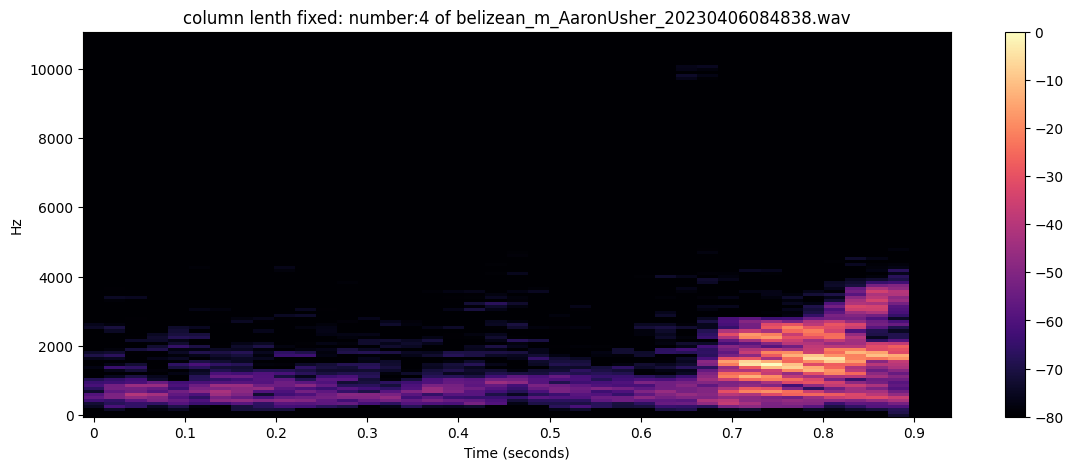

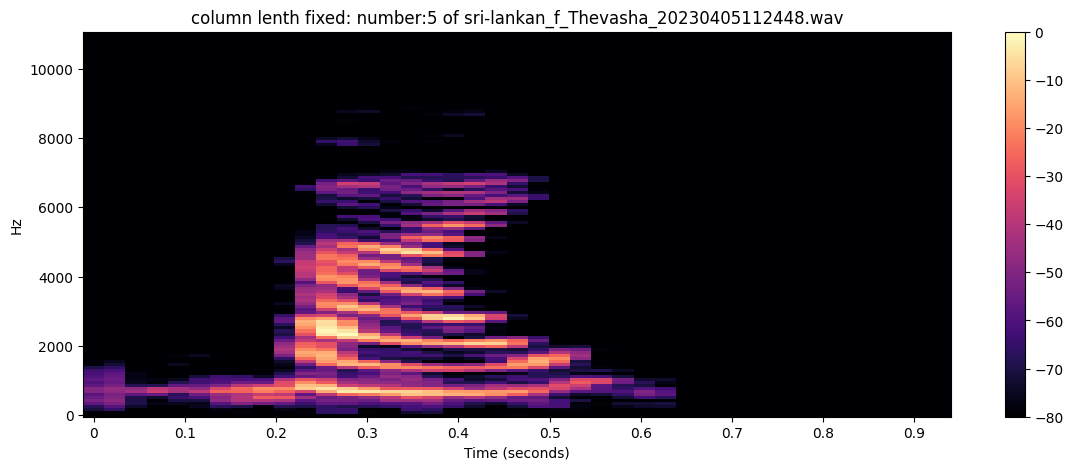

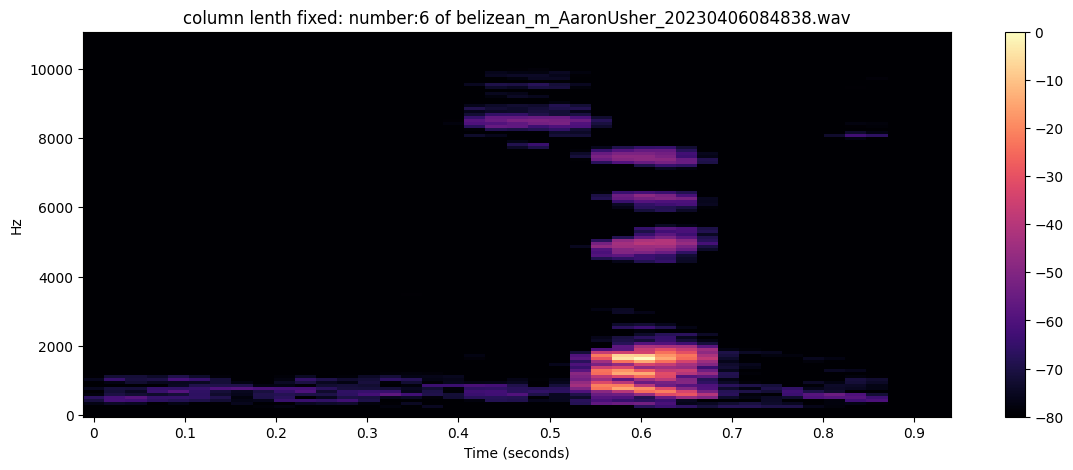

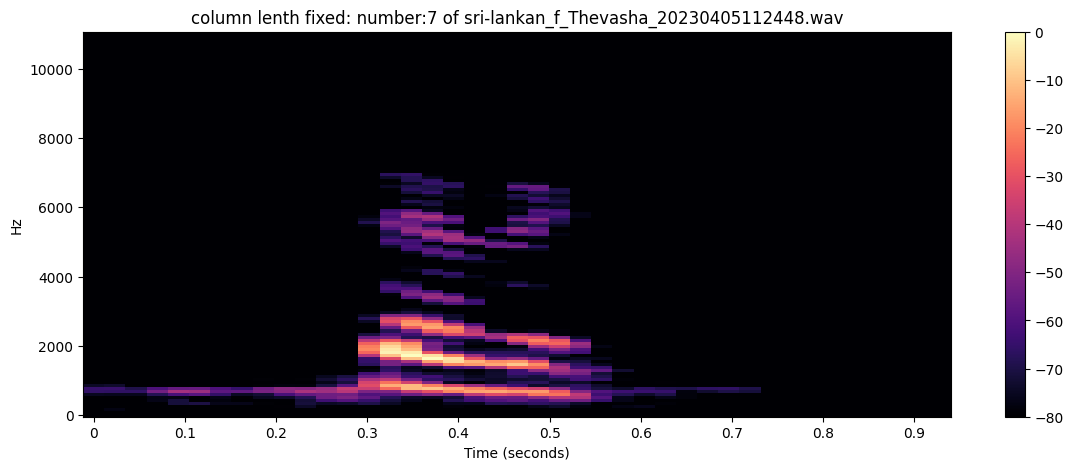

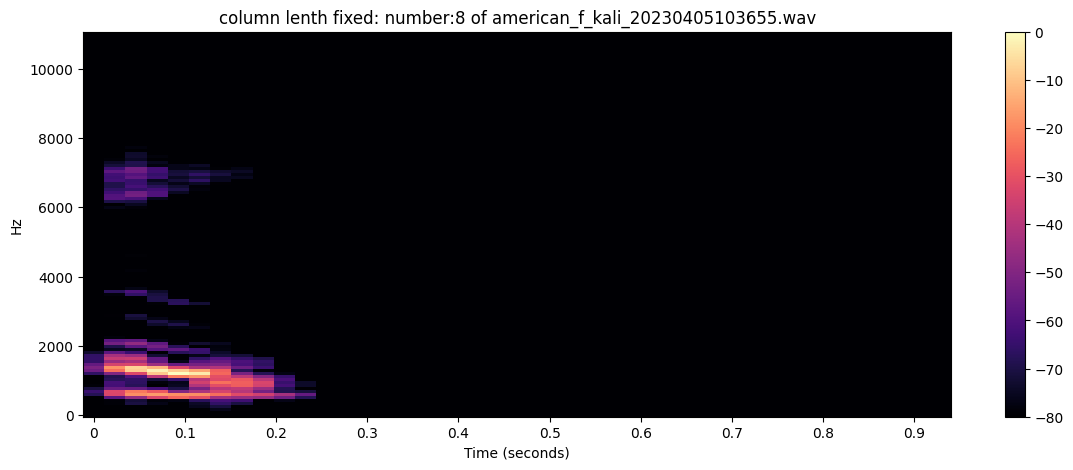

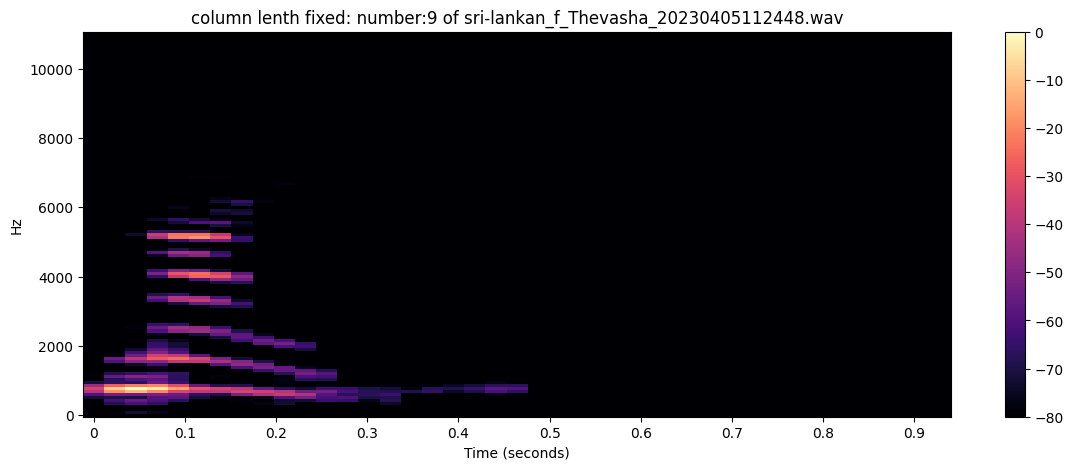

In [13]:
#setup the same dimension size to the all croped mel spectrograms
mel_spectro_crop_dictionary_fix_dim= {}
#maximum number of columns among all arrays
max_cols = max([arr.shape[1] for num, mel_spectrogram_crop in mel_spectrogram_crop_dictionary.items() for arr in mel_spectrogram_crop])

# resize each array to have the same number of columns
for num, mel_spectrogram_crop in mel_spectrogram_crop_dictionary.items():
    c=0
    for i in range(len(mel_spectrogram_crop)):
        new_arr = np.full((mel_spectrogram_crop[i].shape[0], max_cols), mel_spectrogram_crop[i].min())
        new_arr[:,:mel_spectrogram_crop[i].shape[1]]= mel_spectrogram_crop[i]
        mel_spectrogram_crop[i] = new_arr

        if c==0:
            plt.figure(figsize=(14,5))
            img=librosa.display.specshow(new_arr,sr=sr,x_axis='s',y_axis='linear')
            plt.title(f'column lenth fixed: number:{num} of {os.listdir(f"{path}{num}/")[i]}')
            plt.colorbar()
            c=1
        
    mel_spectro_crop_dictionary_fix_dim.update({num : mel_spectrogram_crop})

In [15]:
# Writing all the data to pickle files
import pickle


file_names = ['waveforms', 'spectrograms', 'mel_spectrograms', 'mel_spectrogram_crop', 'mel_spectro_crop_dictionary_fix_dim']
data_dictionaries = [waveforms_dictionary, spectrograms_dictionary, mel_spectrogram_dictionary, mel_spectrogram_crop_dictionary, mel_spectro_crop_dictionary_fix_dim]

for i in range(len(file_names)):

    # Open a file for writing
    with open(f"./data/{file_names[i]}.pickle", "wb") as f:
        # Write the dictionary data to the file as Pickle
        pickle.dump(data_dictionaries[i], f)

    print("Dictionary data written to file successfully")


Dictionary data written to file successfully
Dictionary data written to file successfully
Dictionary data written to file successfully
Dictionary data written to file successfully
Dictionary data written to file successfully
